# Heart Disease Prediction Using Different Machine Learning Data Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("cardio_data.csv")

In [3]:
df.shape

(70000, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


In [5]:
df.isnull().sum()

date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.disease.value_counts()

0    35021
1    34979
Name: disease, dtype: int64

0----Absence of Heart disease 
1----Presence of Heart disease

In [8]:
df.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Data is unequally distributed between 2 genders. Based on the Average height calculated for the gender, number 1 and 2 are interpreted as,
Gender : 1----Female 
         2----Male

In [9]:
print(df.groupby('gender')['height'].describe())

          count        mean       std   min    25%    50%    75%    max
gender                                                                 
1       45530.0  161.355612  7.052726  55.0  157.0  161.0  166.0  250.0
2       24470.0  169.947895  7.228895  65.0  165.0  170.0  175.0  207.0


In [10]:
print(np.unique(df[['gluc']].values))
print(np.unique(df[['active']].values))
print(np.unique(df[['cholesterol']].values))
print(np.unique(df[['smoke']].values))
print(np.unique(df[['alco']].values))
print(np.unique(df[['gender']].values))

[1 2 3]
[0 1]
[1 2 3]
[0 1]
[0 1]
[1 2]


gluc :    1--- Normal        2--- Above Normal     3--- Well Above Normal
active :  1---active         0---sluggish
cholesterol : 1---normal     2---above normal      3---well above normal
smoke :   1---smoking        0---non-smoking
alco  :   1---Alcoholic      0---Non-Alcoholic

In [11]:
df.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


In [12]:
df.corr()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
id,1.000000,0.003755,0.003457,0.001210,0.003356,-0.002529,0.006106,0.003502,0.002467,-0.003038,-0.003699,-0.001830,0.003799
active,0.003755,1.000000,-0.009927,0.025476,-0.000033,0.004780,0.009911,0.005866,-0.006770,-0.006570,0.025858,-0.016867,-0.035653
age,0.003457,-0.009927,1.000000,-0.029723,0.020764,0.017647,0.154424,-0.022811,0.098703,-0.081515,-0.047633,0.053684,0.238159
alco,0.001210,0.025476,-0.029723,1.000000,0.001408,0.010601,0.035760,0.170966,0.011246,0.094419,0.340094,0.067113,-0.007330
ap_hi,0.003356,-0.000033,0.020764,0.001408,1.000000,0.016086,0.023778,0.006005,0.011841,0.005488,-0.000922,0.030702,0.054475
ap_lo,-0.002529,0.004780,0.017647,0.010601,0.016086,1.000000,0.024019,0.015254,0.010806,0.006150,0.005186,0.043710,0.065719
cholesterol,0.006106,0.009911,0.154424,0.035760,0.023778,0.024019,1.000000,-0.035821,0.451578,-0.050226,0.010354,0.141768,0.221147
gender,0.003502,0.005866,-0.022811,0.170966,0.006005,0.015254,-0.035821,1.000000,-0.020491,0.499033,0.338135,0.155406,0.008109
gluc,0.002467,-0.006770,0.098703,0.011246,0.011841,0.010806,0.451578,-0.020491,1.000000,-0.018595,-0.004756,0.106857,0.089307
height,-0.003038,-0.006570,-0.081515,0.094419,0.005488,0.006150,-0.050226,0.499033,-0.018595,1.000000,0.187989,0.290968,-0.010821


# Data Cleaning and Transformation

In [13]:
# Change age given in days to years
df["age"]=df["age"]//365

In [14]:
# Create new feature BMI(Body Mass Index): ratio of weight to height
df['height']= df["height"] / 100 # convert height(cm) into height(m) 
df['BMI']= df['weight']/df['height']**2

   ap_lo : diastolic blood pressure 
   ap_hi : systolic blood pressure
   Calculate Mean Arterial Pressure (MAP) = (2 Diastollic Blood Pressure + Sistolic Blood Pressure)/3

In [15]:
# Create new feature MAP(Mean Arterial Pressure):
df['MAP'] = (2 * df['ap_lo'] + df['ap_hi']) / 3


# Data Binning 🚮 or Discretization

In [16]:
bin_BMI = [15, 20, 25, 30 ,40]
category_BMI = ['0','1', '2','3']
df['BMI_bin'] = pd.cut(df['BMI'], bins=bin_BMI, labels=category_BMI)

In [17]:
bin_MAP = [0,60, 70, 80, 90, 100, 110, 120]
category_MAP = ['0','1', '2','3','4','5','6']
df['MAP_bin'] = pd.cut(df['MAP'], bins=bin_MAP, labels=category_MAP)


In [18]:
bin_age = [29, 35, 40, 45, 50, 55, 60, 65]
category_age = ['0','1', '2','3','4','5','6']
df['age_bin'] = pd.cut(df['age'], bins=bin_age, labels=category_age)


In [19]:
df.fillna(method='ffill', inplace=True)

In [20]:
df.shape

(70000, 21)

In [21]:
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,...,height,occupation,smoke,weight,disease,BMI,MAP,BMI_bin,MAP_bin,age_bin
0,3/5/2021,Indonesia,0,1,50,0,110,80,1,2,...,1.68,Architect,0,62.0,0,21.967120,90.000000,1,3,3
1,5/8/2021,Malaysia,1,1,55,0,140,90,3,1,...,1.56,Accountant,0,85.0,1,34.927679,106.666667,3,5,4
2,13/11/2022,Indonesia,2,0,51,0,130,70,3,1,...,1.65,Chef,0,64.0,1,23.507805,90.000000,1,3,4
3,31/10/2018,Singapore,3,1,48,0,150,100,1,2,...,1.69,Lawyer,0,82.0,1,28.710479,116.666667,2,6,3
4,25/9/2020,Singapore,4,0,47,0,100,60,1,1,...,1.56,Architect,0,56.0,0,23.011177,73.333333,1,2,3


In [22]:
df=df.drop(['date','occupation','country','id'],axis=1)


# Exploratory Data Analysis(EDA)

<Axes: xlabel='disease', ylabel='count'>

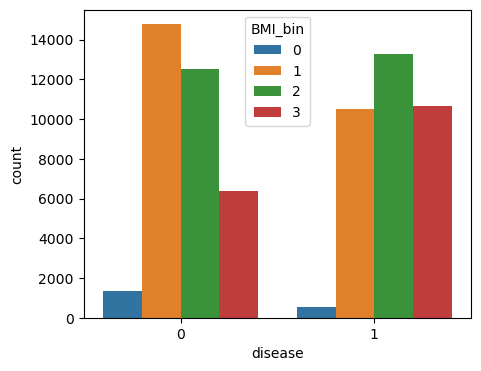

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.countplot(x=df['disease'],hue='BMI_bin',data=df)

<Axes: xlabel='disease', ylabel='count'>

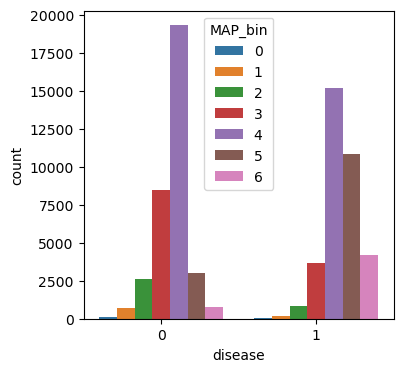

In [24]:
plt.figure(figsize=(4, 4))
sns.countplot(x=df['disease'],hue='MAP_bin',data=df)

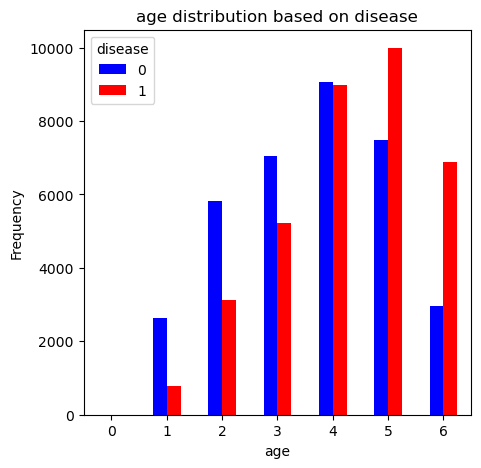

In [25]:
crosstab = pd.crosstab(df.age_bin, df.disease)
crosstab.plot(kind="bar", figsize=(5, 5), color=['blue', 'red'])
plt.title('age distribution based on disease')
plt.xlabel('age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

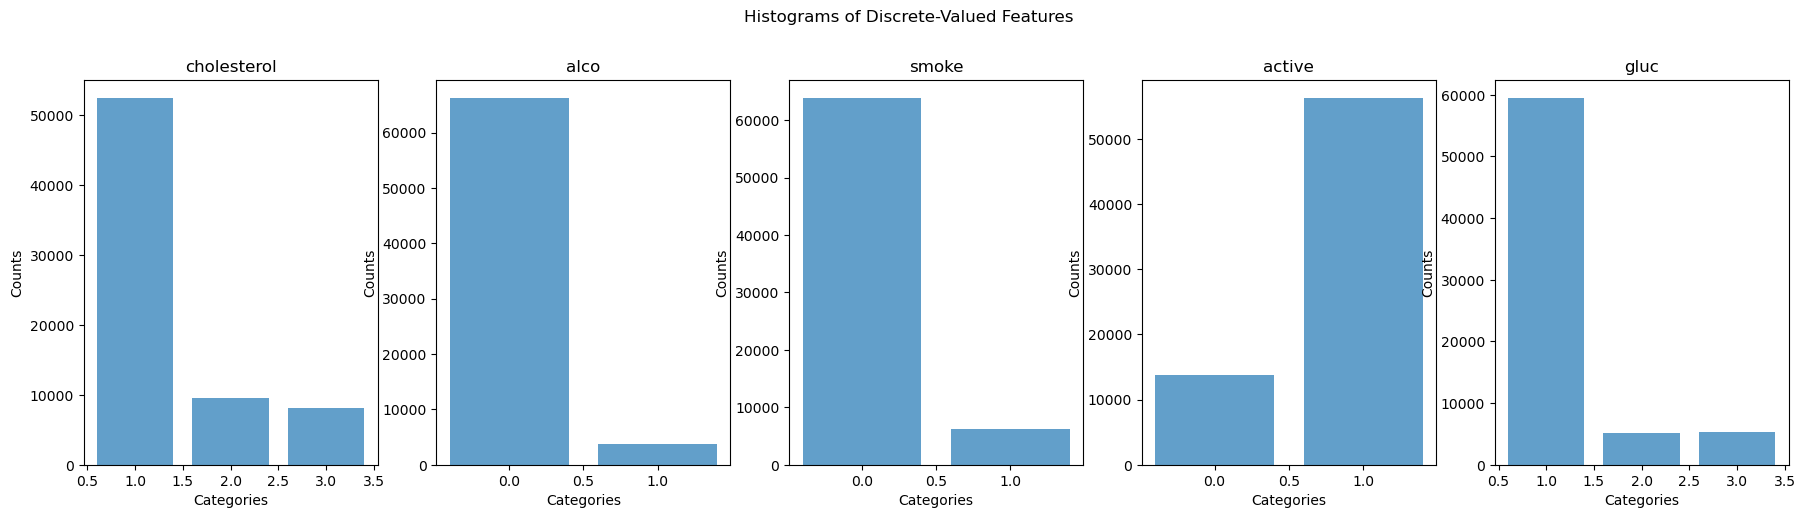

In [26]:
import matplotlib.pyplot as plt

# Select the columns of interest
categories = ['cholesterol', 'alco', 'smoke', 'active', 'gluc']

# Create a subplot for each category
fig, axs = plt.subplots(1, len(categories), figsize=(22, 5))

# Create a bar plot for each category
for i, category in enumerate(categories):
    counts = df[category].value_counts().sort_index()
    axs[i].bar(counts.index, counts, alpha=0.7)
    axs[i].set_title(category)
    axs[i].set_xlabel('Categories')
    axs[i].set_ylabel('Counts')

plt.suptitle('Histograms of Discrete-Valued Features', y=1.02)
plt.show()


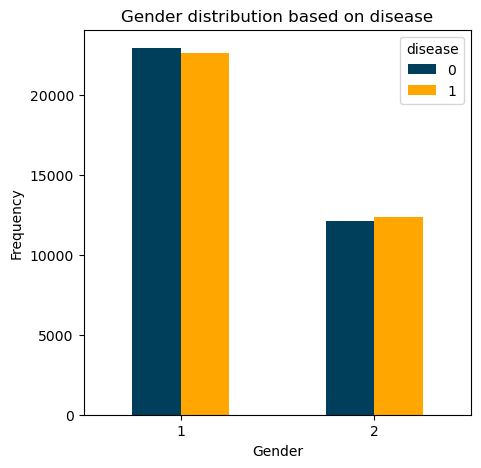

In [27]:
pd.crosstab(df.gender,df.disease).plot(kind="bar",figsize=(5,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on disease')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

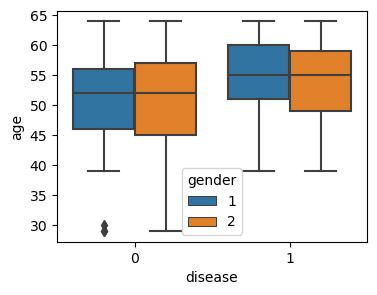

In [28]:
plt.figure (figsize = (4,3))
sns.boxplot(x="disease", y="age", hue="gender", data=df)
plt.show()

# Identifying the Outliers  and remove from the dataframe

<Axes: >

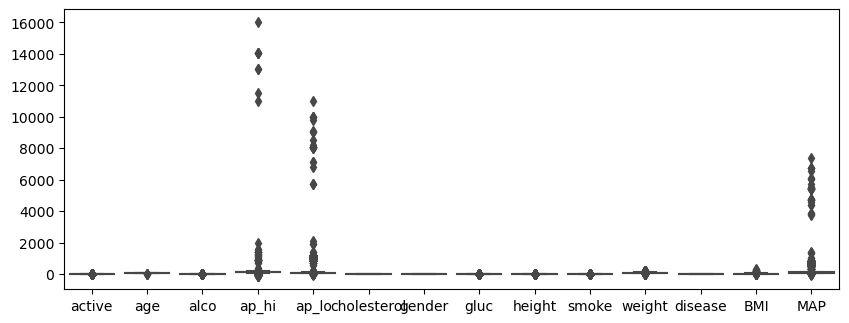

In [29]:
plt.figure(figsize=(22,8))
plt.subplot(2,2,1)
sns.boxplot(data=df)

<Axes: >

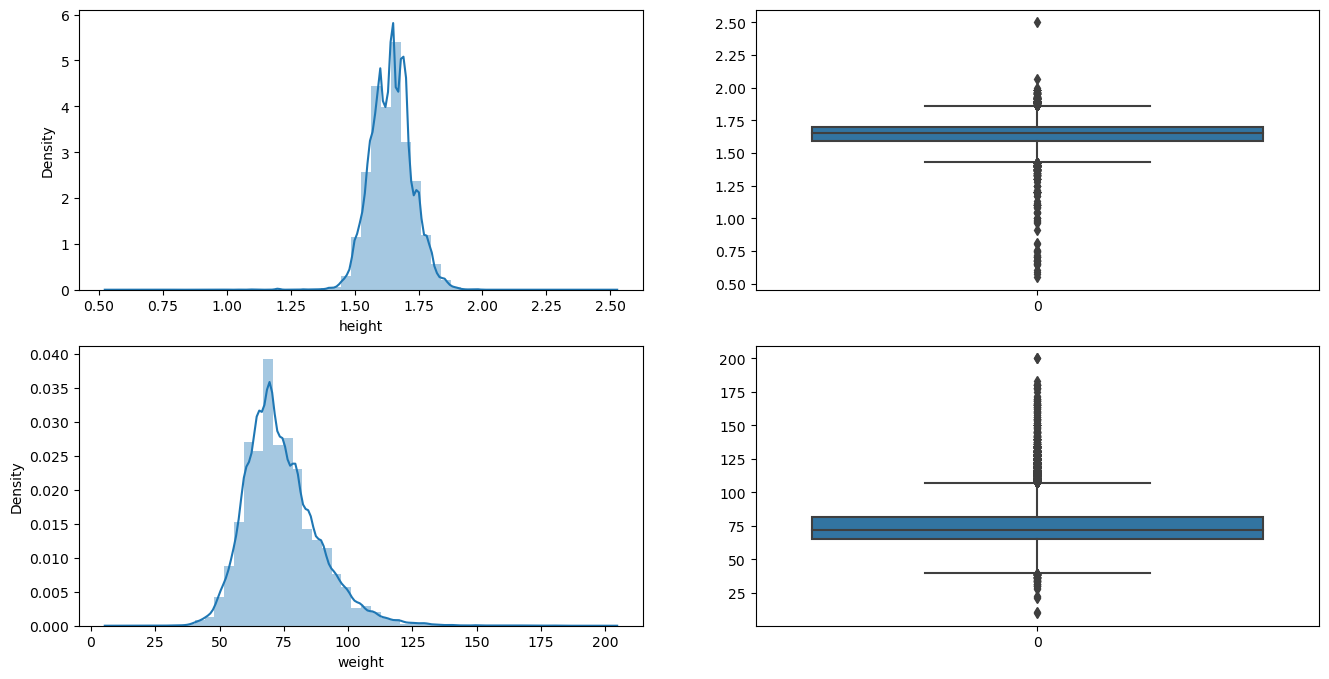

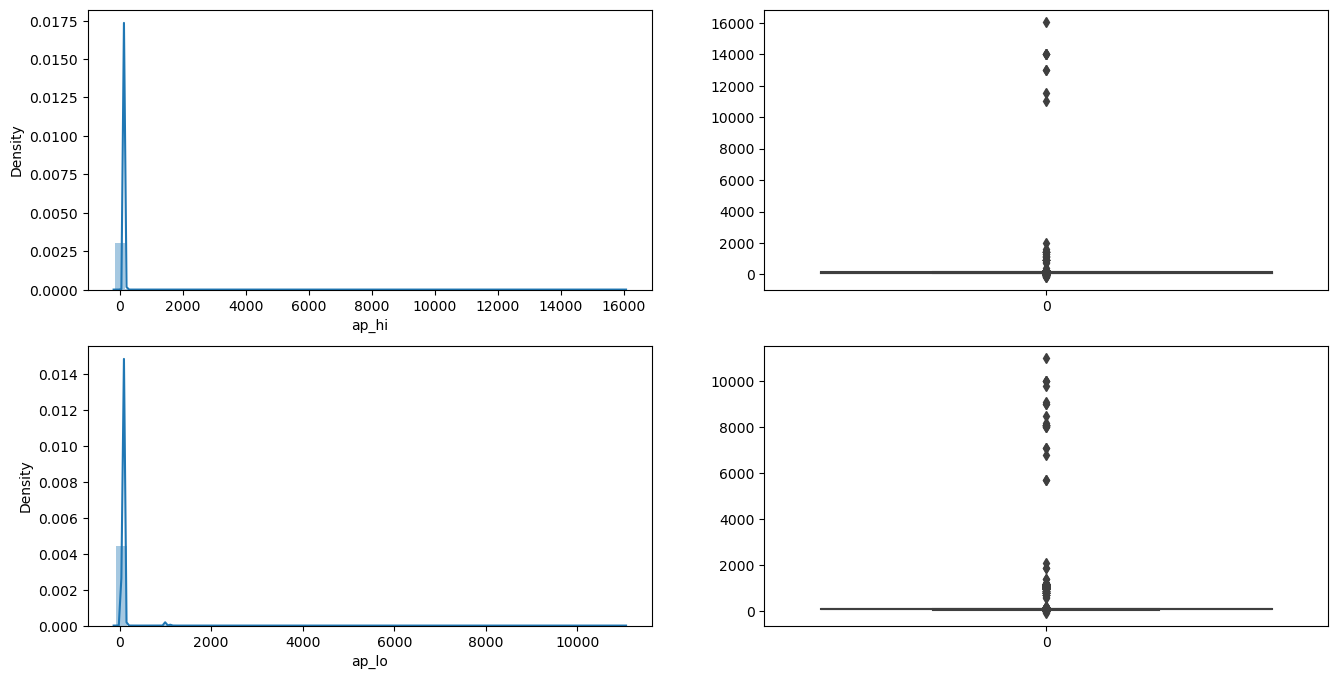

In [30]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['height'])

plt.subplot(2,2,2)
sns.boxplot(df['height'])

plt.subplot(2,2,3)
sns.distplot(df['weight'])

plt.subplot(2,2,4)
sns.boxplot(df['weight'])

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['ap_hi'])

plt.subplot(2,2,2)
sns.boxplot(df['ap_hi'])

plt.subplot(2,2,3)
sns.distplot(df['ap_lo'])

plt.subplot(2,2,4)
sns.boxplot(df['ap_lo'])

Removing the Outliers from Dataframe, df:

In [31]:
df
# Define the columns to check for outliers :
columns_to_check = ['height', 'weight', 'ap_lo', 'ap_hi','age','BMI','MAP']

# Calculate the IQR for each column :
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection :
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('upperlimit : ', upper_bound)
print('lowerlimit : ', lower_bound)
# Identifying rows containing outliers in any of the specified columns :
outliers = ((df[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)).any(axis=1)

# Remove rows with outliers :
df1 = df[~outliers]

upperlimit :  height      1.865000
weight    107.500000
ap_lo     105.000000
ap_hi     170.000000
age        73.000000
BMI        39.742883
MAP       118.333333
dtype: float64
lowerlimit :  height     1.425000
weight    39.500000
ap_lo     65.000000
ap_hi     90.000000
age       33.000000
BMI       14.354454
MAP       78.333333
dtype: float64


In [32]:
df1.shape # df_no_outliers contains DataFrame with outliers removed

(60292, 17)

<Axes: >

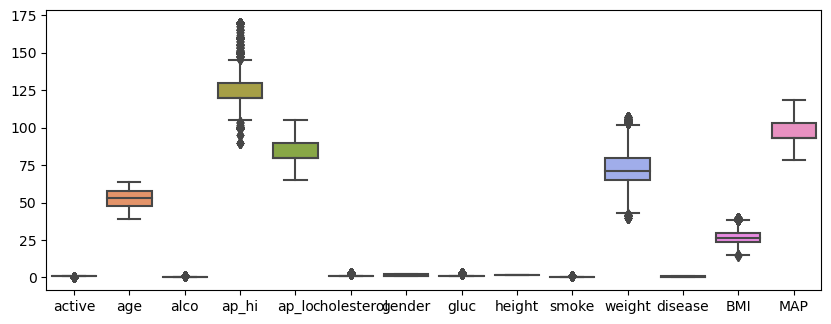

In [33]:
plt.figure(figsize=(22,8))
plt.subplot(2,2,1)
sns.boxplot(data=df1)

<Axes: >

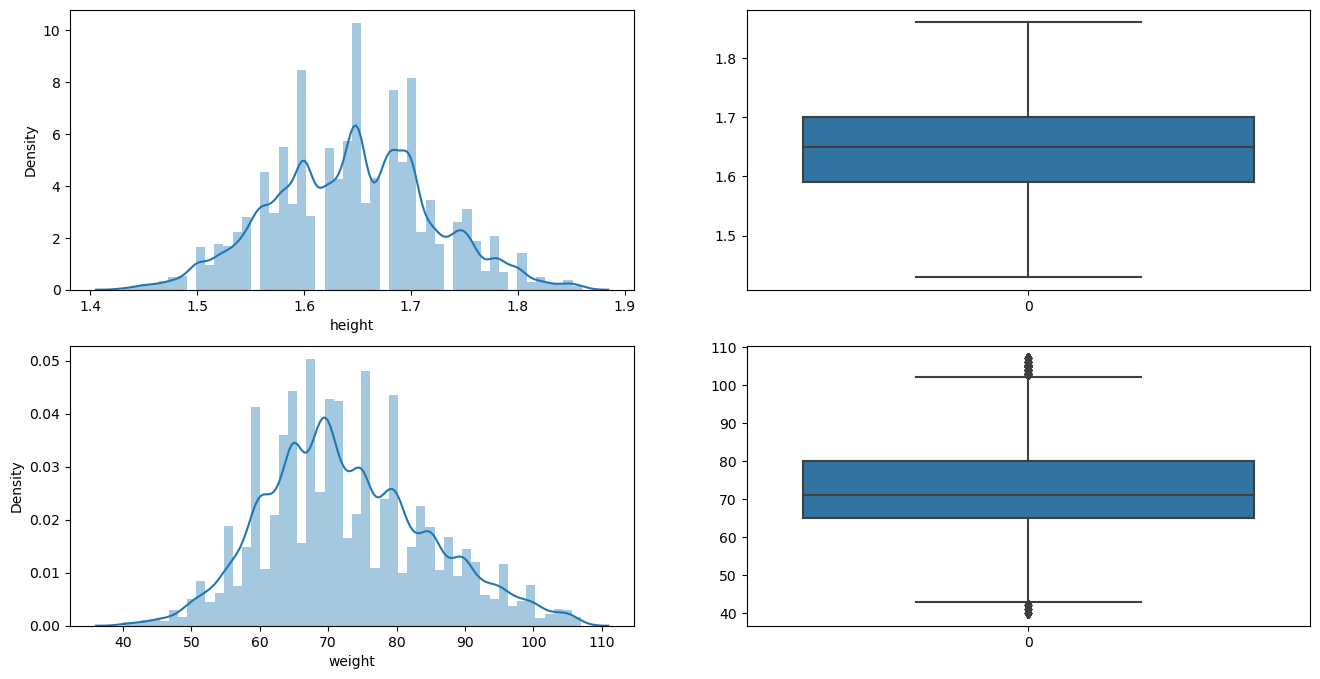

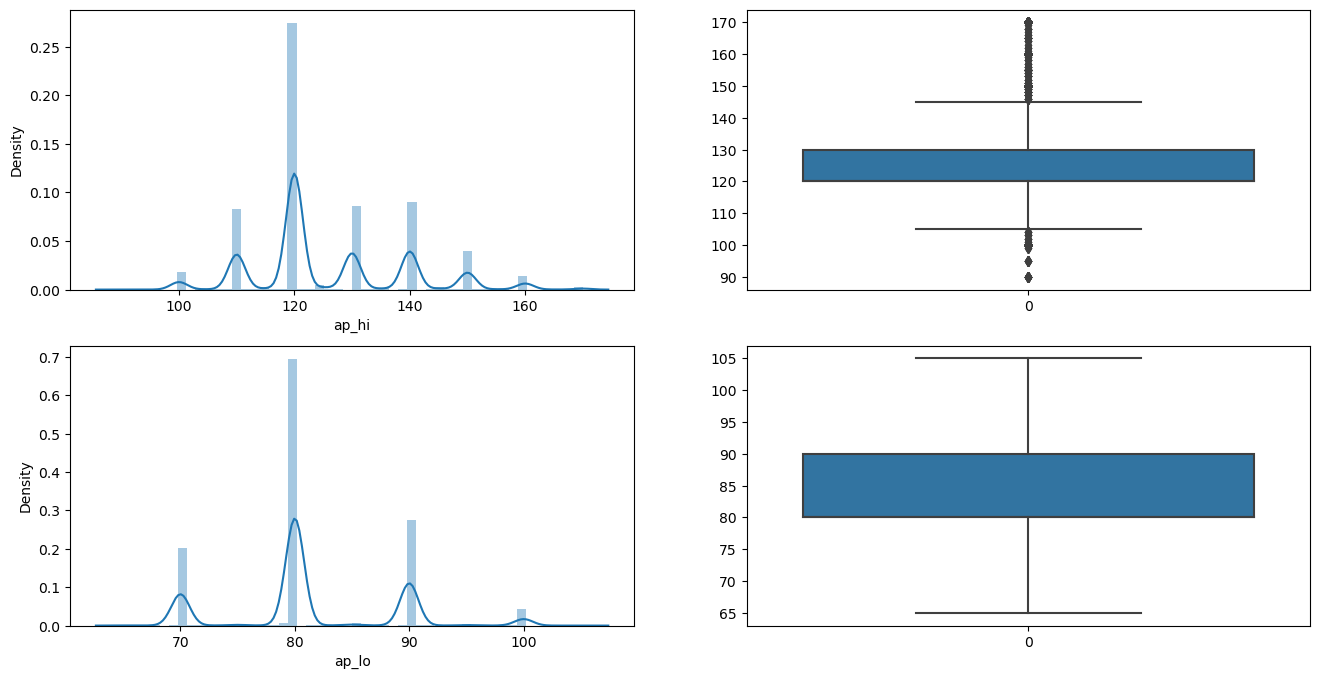

In [34]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['height'])

plt.subplot(2,2,2)
sns.boxplot(df1['height'])

plt.subplot(2,2,3)
sns.distplot(df1['weight'])

plt.subplot(2,2,4)
sns.boxplot(df1['weight'])

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['ap_hi'])

plt.subplot(2,2,2)
sns.boxplot(df1['ap_hi'])

plt.subplot(2,2,3)
sns.distplot(df1['ap_lo'])

plt.subplot(2,2,4)
sns.boxplot(df1['ap_lo'])

In [35]:
df1
# Define the columns to check for outliers :
columns_to_check = ['weight','ap_hi','BMI']

# Calculate the IQR for each column :
Q1 = df1[columns_to_check].quantile(0.25)
Q3 = df1[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection :
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('upperlimit : ', upper_bound)
print('lowerlimit : ', lower_bound)
# Identifying rows containing outliers in any of the specified columns :
outliers = ((df1[columns_to_check] < lower_bound) | (df1[columns_to_check] > upper_bound)).any(axis=1)

# Remove rows with outliers :
new_df = df1[~outliers]
new_df.shape

upperlimit :  weight    102.500000
ap_hi     145.000000
BMI        38.357381
dtype: float64
lowerlimit :  weight     42.500000
ap_hi     105.000000
BMI        15.118193
dtype: float64


(51948, 17)

<Axes: >

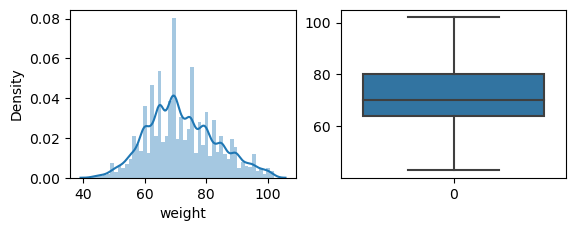

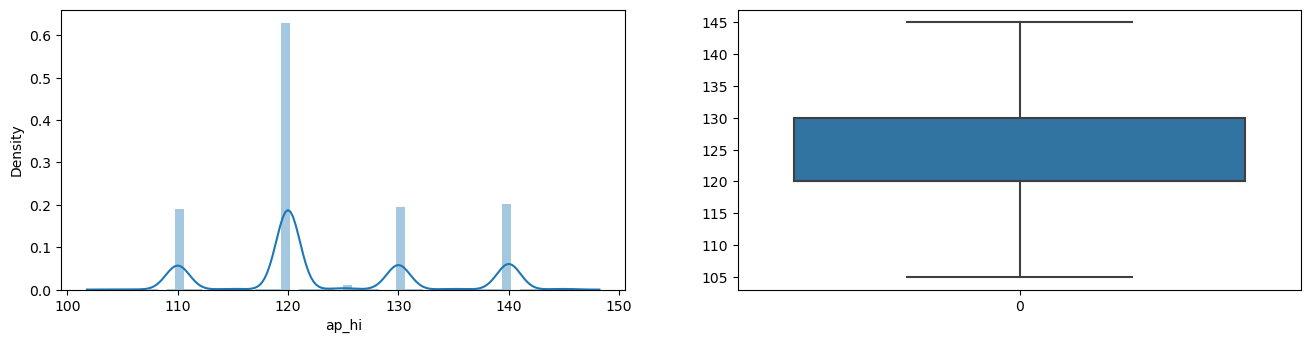

In [36]:
plt.subplot(2,2,3)
sns.distplot(new_df['weight'])

plt.subplot(2,2,4)
sns.boxplot(new_df['weight'])

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df['ap_hi'])

plt.subplot(2,2,2)
sns.boxplot(new_df['ap_hi'])

In [37]:
new_df.shape

(51948, 17)

In [38]:
new_df=new_df.drop(['weight','height','ap_lo','ap_hi','BMI','MAP','age'],axis=1)

In [39]:
new_df.head()

,active,alco,cholesterol,gender,gluc,smoke,disease,BMI_bin,MAP_bin,age_bin
0,1,0,1,2,1,0,0,1,3,3
1,1,0,3,1,1,0,1,3,5,4
2,0,0,3,1,1,0,1,1,3,4
5,0,0,2,1,2,0,0,2,4,5
6,1,0,3,1,1,0,0,3,4,5


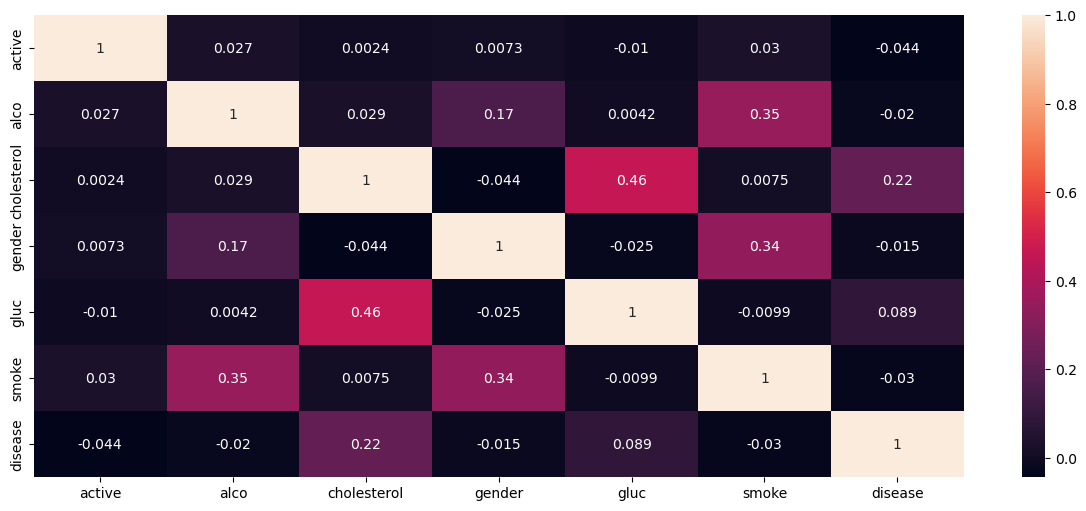

In [40]:
plt.figure(figsize = (15,6))
sns.heatmap(new_df.corr(), annot = True);

In [41]:
new_df.shape

(51948, 10)

Now the DataFrame new_df has reduced to 51948 rows and 10 columns.

In [42]:
df1_F = new_df[new_df['gender'] == 1]
display(df1_F)
df1_M = new_df[new_df['gender'] == 2]
display(df1_M)

,active,alco,cholesterol,gender,gluc,smoke,disease,BMI_bin,MAP_bin,age_bin
1,1,0,3,1,1,0,1,3,5,4
2,0,0,3,1,1,0,1,1,3,4
5,0,0,2,1,2,0,0,2,4,5
6,1,0,3,1,1,0,0,3,4,5
8,1,0,1,1,1,0,0,2,3,3
...,...,...,...,...,...,...,...,...,...,...
69990,1,0,1,1,1,0,1,2,3,2
69991,1,0,2,1,2,0,0,2,5,5
69993,1,0,1,1,1,0,1,1,5,4
69998,0,0,1,1,2,0,1,2,4,6


,active,alco,cholesterol,gender,gluc,smoke,disease,BMI_bin,MAP_bin,age_bin
0,1,0,1,2,1,0,0,1,3,3
7,1,0,3,2,3,0,1,2,5,6
11,1,0,1,2,1,0,0,1,4,4
12,0,0,1,2,1,0,0,1,4,1
14,1,1,1,2,1,1,0,2,5,1
...,...,...,...,...,...,...,...,...,...,...
69975,1,0,1,2,1,0,1,3,4,5
69980,0,1,1,2,1,0,0,1,3,3
69984,1,0,1,2,1,0,1,2,4,3
69986,1,0,1,2,1,0,0,1,4,3


# K-Mode clustering : Unsupervised Machine Learning

In [43]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [44]:
from kmodes.kmodes import KModes

# Load the categorical data into a DataFrame
df1_F

,active,alco,cholesterol,gender,gluc,smoke,disease,BMI_bin,MAP_bin,age_bin
1,1,0,3,1,1,0,1,3,5,4
2,0,0,3,1,1,0,1,1,3,4
5,0,0,2,1,2,0,0,2,4,5
6,1,0,3,1,1,0,0,3,4,5
8,1,0,1,1,1,0,0,2,3,3
...,...,...,...,...,...,...,...,...,...,...
69990,1,0,1,1,1,0,1,2,3,2
69991,1,0,2,1,2,0,0,2,5,5
69993,1,0,1,1,1,0,1,1,5,4
69998,0,0,1,1,2,0,1,2,4,6


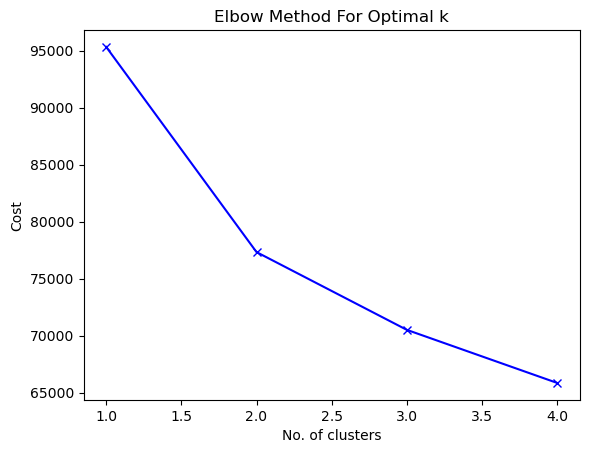

In [45]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5)
    kmode.fit_predict(df1_F)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [46]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df1_F)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3657, cost: 87723.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5261, cost: 78143.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4976, cost: 82964.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6187, cost: 75765.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9035, cost: 80806.0
Run 5, iteration: 2/100, moves: 2157, cost: 80806.0
Best run was number 4


array([0, 0, 1, ..., 0, 1, 0], dtype=uint16)

In [47]:
df1_F.insert(0, "Cluster", clusters, True)
df1_F

,Cluster,active,alco,cholesterol,gender,gluc,smoke,disease,BMI_bin,MAP_bin,age_bin
1,0,1,0,3,1,1,0,1,3,5,4
2,0,0,0,3,1,1,0,1,1,3,4
5,1,0,0,2,1,2,0,0,2,4,5
6,0,1,0,3,1,1,0,0,3,4,5
8,0,1,0,1,1,1,0,0,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...
69990,1,1,0,1,1,1,0,1,2,3,2
69991,1,1,0,2,1,2,0,0,2,5,5
69993,0,1,0,1,1,1,0,1,1,5,4
69998,1,0,0,1,1,2,0,1,2,4,6


<Axes: xlabel='age_bin', ylabel='count'>

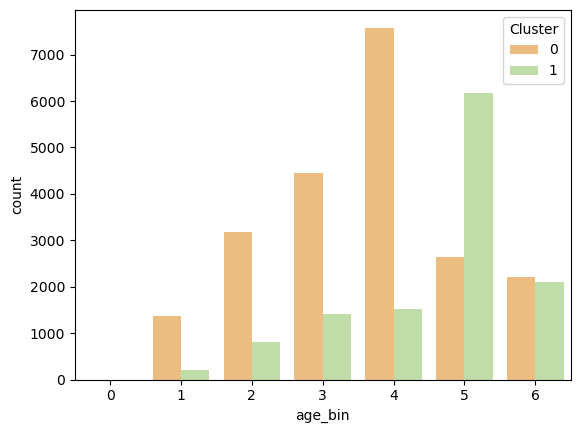

In [48]:
sns.countplot(data=df1_F, x= 'age_bin', hue = 'Cluster' , palette='Spectral')

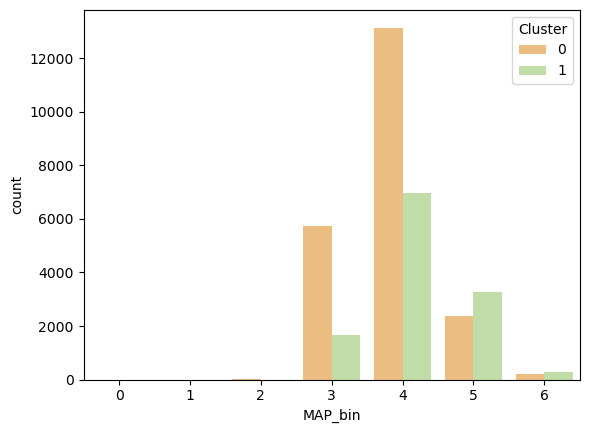

In [49]:
ax=sns.countplot(data=df1_F, x= 'MAP_bin', hue = 'Cluster' , palette='Spectral')

In [ ]:
svc = SVC(Cluster,active,alco,cholesterol,gender,gluc,smoke,disease,BMI_bin,MAP_bin,age_bin)  # You can specify parameters as needed
svc.fit(X_train, y_train)
svc_prediction = svc.predict([[1, 0, 1, 2, 1, 0, 1, 3, 3]])[0]

print("SVC prediction:", svc_prediction)

K-Mode Custering for gender---2

In [50]:
df1_M

,active,alco,cholesterol,gender,gluc,smoke,disease,BMI_bin,MAP_bin,age_bin
0,1,0,1,2,1,0,0,1,3,3
7,1,0,3,2,3,0,1,2,5,6
11,1,0,1,2,1,0,0,1,4,4
12,0,0,1,2,1,0,0,1,4,1
14,1,1,1,2,1,1,0,2,5,1
...,...,...,...,...,...,...,...,...,...,...
69975,1,0,1,2,1,0,1,3,4,5
69980,0,1,1,2,1,0,0,1,3,3
69984,1,0,1,2,1,0,1,2,4,3
69986,1,0,1,2,1,0,0,1,4,3


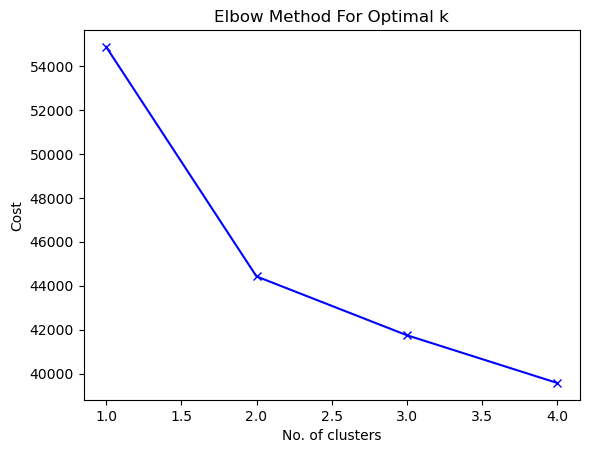

In [51]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5)
    kmode.fit_predict(df1_M)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [52]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df1_M)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3780, cost: 44421.0
Run 1, iteration: 2/100, moves: 2539, cost: 44421.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1822, cost: 49799.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2141, cost: 45364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4601, cost: 44421.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 5653, cost: 44421.0
Run 5, iteration: 2/100, moves: 285, cost: 44421.0
Best run was number 1


array([0, 1, 0, ..., 1, 0, 0], dtype=uint16)

In [84]:
df1_M.insert(0, "Cluster", clusters, True)
df1_M

,Cluster,Cluster,Cluster,active,alco,cholesterol,gender,gluc,smoke,disease,BMI_bin,MAP_bin,age_bin
0,0,0,0,1,0,1,2,1,0,0,1,3,3
7,1,1,1,1,0,3,2,3,0,1,2,5,6
11,0,0,0,1,0,1,2,1,0,0,1,4,4
12,0,0,0,0,0,1,2,1,0,0,1,4,1
14,0,0,0,1,1,1,2,1,1,0,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69975,1,1,1,1,0,1,2,1,0,1,3,4,5
69980,0,0,0,0,1,1,2,1,0,0,1,3,3
69984,1,1,1,1,0,1,2,1,0,1,2,4,3
69986,0,0,0,1,0,1,2,1,0,0,1,4,3


<Axes: xlabel='MAP_bin', ylabel='count'>

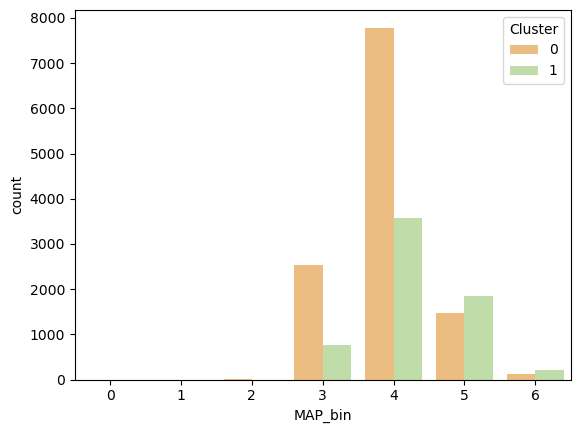

In [54]:
sns.countplot(data=df1_M, x= 'MAP_bin', hue = 'Cluster' , palette='Spectral')

<Axes: xlabel='age_bin', ylabel='count'>

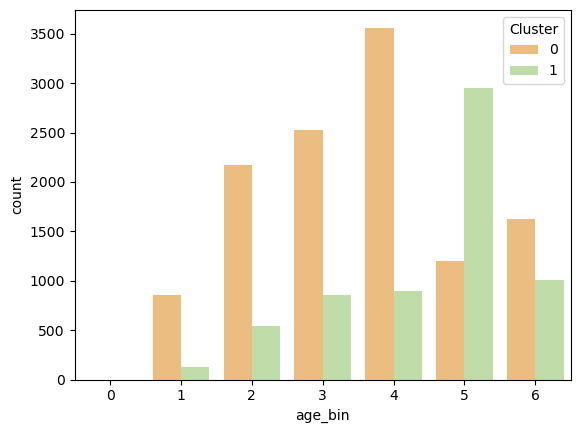

In [55]:
sns.countplot(data=df1_M, x= 'age_bin', hue = 'Cluster' , palette='Spectral')

# Supervised Machine Learning Models :

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [86]:
X = df1_F.drop(["disease"], axis=1)
y = df1_F["disease"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [90]:
X.head()

,Cluster,active,alco,cholesterol,gender,gluc,smoke,BMI_bin,MAP_bin,age_bin
1,0,1,0,3,1,1,0,3,5,4
2,0,0,0,3,1,1,0,1,3,4
5,1,0,0,2,1,2,0,2,4,5
6,0,1,0,3,1,1,0,3,4,5
8,0,1,0,1,1,1,0,2,3,3


The Feature Engineering (FE) method that used is one-hot encoding, which is transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction.

In [87]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


In [59]:
print(X.shape,X_train.shape, X_test.shape)

(33622, 10) (26897, 25) (6725, 25)


#Logistic Regression

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)

print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3714
           1       0.91      0.74      0.82      3011

    accuracy                           0.85      6725
   macro avg       0.86      0.84      0.85      6725
weighted avg       0.86      0.85      0.85      6725

[[3491  223]
 [ 769 2242]]
Logistic Regression accuracy is: 85.25%


RandomForestClassifier :

In [61]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3714
           1       0.87      0.81      0.84      3011

    accuracy                           0.86      6725
   macro avg       0.86      0.85      0.86      6725
weighted avg       0.86      0.86      0.86      6725

[[3347  367]
 [ 580 2431]]
Random Forest accuracy is: 85.92%


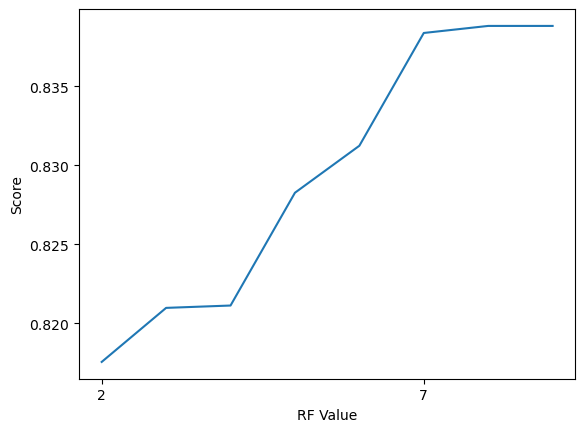

RF Acc Max 83.88%


In [62]:
scoreListRF = []
for i in range(2,10):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,10), scoreListRF)
plt.xticks(np.arange(2,10,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

#DecisionTreeClassifier 

In [63]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3714
           1       0.89      0.78      0.84      3011

    accuracy                           0.86      6725
   macro avg       0.87      0.85      0.86      6725
weighted avg       0.86      0.86      0.86      6725

[[3434  280]
 [ 648 2363]]
Decision Tree accuracy is: 86.20%


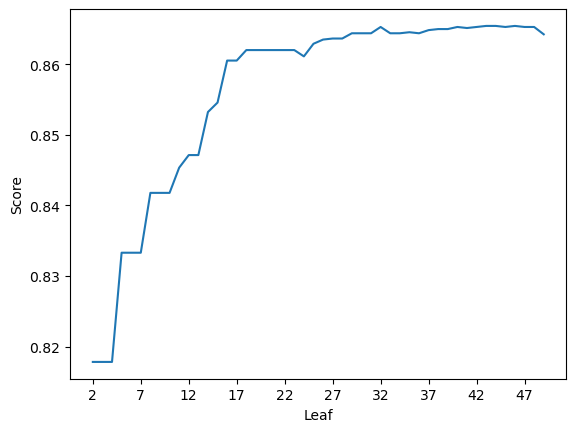

DT Acc Max 86.54%


In [64]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

#Support Vector Machine (SVM) Classifier 

In [88]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
svc=SVC()   # SVC stands for Support Vector Classifier

svc.fit(X_train,y_train) 

svcPrediction=svc.predict(X_test)

svcAccuracy = metrics.accuracy_score(svcPrediction,y_test)

print("The accuracy of SVM model is:", svcAccuracy*100, "%")

The accuracy of SVM model is: 86.49814126394052 %


In [92]:
svc = SVC(Cluster,active,alco,cholesterol,gender,gluc,smoke,disease,BMI_bin,MAP_bin,age_bin)  # You can specify parameters as needed
svc.fit(X_train, y_train)
svc_prediction = svc.predict([[1, 0, 1, 2, 1, 0, 1, 3, 3]])[0]

print("SVC prediction:", svc_prediction)

NameError: name 'active' is not defined

In [66]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'], 
                        'Accuracy': [LRAcc*100, svcAccuracy*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Decision Tree Max,86.542751
1,SVM,86.498141
2,Decision Tree,86.200743
4,Random Forest,85.918216
0,Logistic Regression,85.249071
5,Random Forest Max,83.881041


#Machine Learning models for df1_M DataFrame

In [67]:

from sklearn import metrics #for checking the model accuracy
import numpy as np

In [68]:
X = df1_M.drop(["disease"], axis=1)
y = df1_M["disease"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [81]:
y.head()

0     0
7     1
11    0
12    0
14    0
Name: disease, dtype: int64

In [70]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)

print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2064
           1       0.90      0.76      0.82      1602

    accuracy                           0.86      3666
   macro avg       0.87      0.85      0.85      3666
weighted avg       0.86      0.86      0.85      3666

[[1924  140]
 [ 385 1217]]
Logistic Regression accuracy is: 85.68%


In [72]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      2064
           1       0.85      0.78      0.81      1602

    accuracy                           0.84      3666
   macro avg       0.84      0.84      0.84      3666
weighted avg       0.84      0.84      0.84      3666

[[1837  227]
 [ 346 1256]]
Random Forest accuracy is: 84.37%


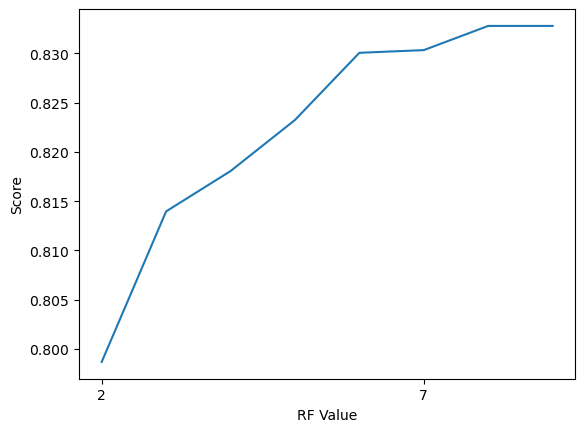

RF Acc Max 83.28%


In [73]:
scoreListRF = []
for i in range(2,10):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,10), scoreListRF)
plt.xticks(np.arange(2,10,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

In [74]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2064
           1       0.85      0.80      0.82      1602

    accuracy                           0.85      3666
   macro avg       0.85      0.85      0.85      3666
weighted avg       0.85      0.85      0.85      3666

[[1837  227]
 [ 318 1284]]
Decision Tree accuracy is: 85.13%


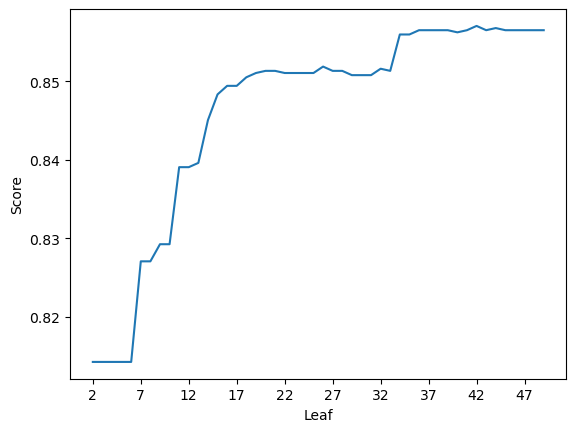

DT Acc Max 85.71%


In [75]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

In [76]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
svc=SVC()   # SVC stands for Support Vector Classifier

svc.fit(X_train,y_train) 

svcPrediction=svc.predict(X_test)

svcAccuracy = metrics.accuracy_score(svcPrediction,y_test)

print("The accuracy of SVM model is:", svcAccuracy*100, "%")

The accuracy of SVM model is: 86.03382433169668 %


Model comparision :

In [77]:
compare1 = pd.DataFrame({'Model': ['Logistic Regression','SVM', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'], 
                        'Accuracy': [LRAcc*100, svcAccuracy*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare1.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,SVM,86.033824
3,Decision Tree Max,85.706492
0,Logistic Regression,85.679214
2,Decision Tree,85.133661
4,Random Forest,84.369885
5,Random Forest Max,83.278778


The Best Model: SVM with 86.4% accuracy

In [78]:
print("The model predicts the person has disease or not =")
print(svcPrediction=svc.predict(X_test)

SyntaxError: incomplete input (1035284693.py, line 2)

In [82]:
#print("The model predicts person has heart disease or Healthy = ")
#print(dt.predict([[1,0,1,2,1,0,1,3,3]])[0])

#svcPrediction=svc.predict()
svc = SVC(Cluster,active,alco,cholesterol,gender,gluc,smoke,disease,BMI_bin,MAP_bin,age_bin)  # You can specify parameters as needed
svc.fit(X_train, y_train)
svc_prediction = svc.predict([[1, 0, 1, 2, 1, 0, 1, 3, 3]])[0]

print("SVC prediction:", svc_prediction)

NameError: name 'Cluster' is not defined